In [3]:
import src.shur_decomposition as shd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def values_comparation(vec1, vec2, method=np.linalg.norm):
    vec1 =  np.sort(np.abs(vec1))
    vec2 = np.sort(np.abs(vec2))

    return method(vec1 - vec2)


### Проверка точности методов

#### Для несимметричного случая:

In [7]:
A = np.random.random((100, 100))

Метод без смещения:

In [8]:
vec1 = shd.eigenvalues(A, eps=1e-12, simmetric=False, method="naive")[0]
vec2 = np.linalg.eig(A)[0]
values_comparation(vec1, vec2)

1.2546196330691818e-12

Метод с смещением на величину правого нижнего элемента:

In [9]:
vec1 = shd.eigenvalues(A, eps=1e-12, simmetric=False, method="simple")[0]
vec2 = np.linalg.eig(A)[0]
values_comparation(vec1, vec2)

6.792372614867531e-13

Метод со смещением на оценку собственного числа:

In [10]:
vec1 = shd.eigenvalues(A, eps=1e-12, simmetric=False, method="wilkinson")[0]
vec2 = np.linalg.eig(A)[0]
values_comparation(vec1, vec2)

1.119557593291063e-12

#### Для симметричного случая:

In [11]:
T = A + A.T 

Метод без смещения:

In [12]:
vec1 = shd.eigenvalues(T, eps=1e-12, simmetric=True, method="naive")[0]
vec2 = np.linalg.eig(T)[0]
values_comparation(vec1, vec2)

5.907572552680778e-13

Простое смещение:

In [13]:
vec1 = shd.eigenvalues(T, eps=1e-12, simmetric=True, method="simple")[0]
vec2 = np.linalg.eig(T)[0]
values_comparation(vec1, vec2)

1.4936583654909353e-13

Смещение через оценку собственного числа:

In [15]:
vec1 = shd.eigenvalues(T, eps=1e-12, simmetric=True, method="wilkinson")[0]
vec2 = np.linalg.eig(T)[0]
values_comparation(vec1, vec2)

1.8990232284825062e-13

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# настройка размера шрифта легенды
mpl.rcParams['legend.title_fontsize'] = 20
mpl.rcParams['legend.fontsize'] = 20

sns.set_style("whitegrid")

Исследуем время работы методов:

In [20]:
naive = []
simple = []
wilkinson = []

for i in range(5, 51, 5):

    A = np.random.random((i, i))

    naive.append(shd.eigenvalues(A, eps=1e-12, simmetric=False, method="naive")[1])
    simple.append(shd.eigenvalues(A, eps=1e-12, simmetric=False, method="simple")[1])
    wilkinson.append(shd.eigenvalues(A, eps=1e-12, simmetric=False, method="wilkinson")[1])

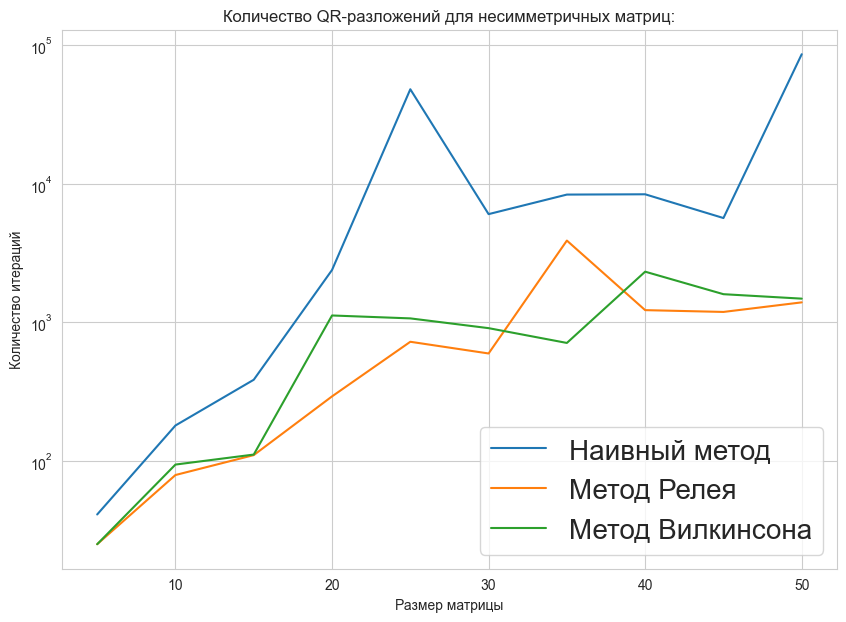

In [26]:
plt.figure(figsize=[10, 7])

plt.title("Количество QR-разложений для несимметричных матриц:")
plt.yscale("log")
plt.xlabel("Размер матрицы")
plt.ylabel("Количество итераций")

args = range(5, 51, 5)

plt.plot(args, naive, label="Наивный метод")
plt.plot(args, simple, label="Метод Релея")
plt.plot(args, wilkinson, label="Метод Вилкинсона")
plt.legend()
plt.show()

In [27]:
simple_2 = []
wilkinson_2 = []

for i in range(5, 200, 5):

    A = np.random.random((i, i))
    simple_2.append(shd.eigenvalues(A, eps=1e-12, simmetric=False, method="simple")[1])
    wilkinson_2.append(shd.eigenvalues(A, eps=1e-12, simmetric=False, method="wilkinson")[1])

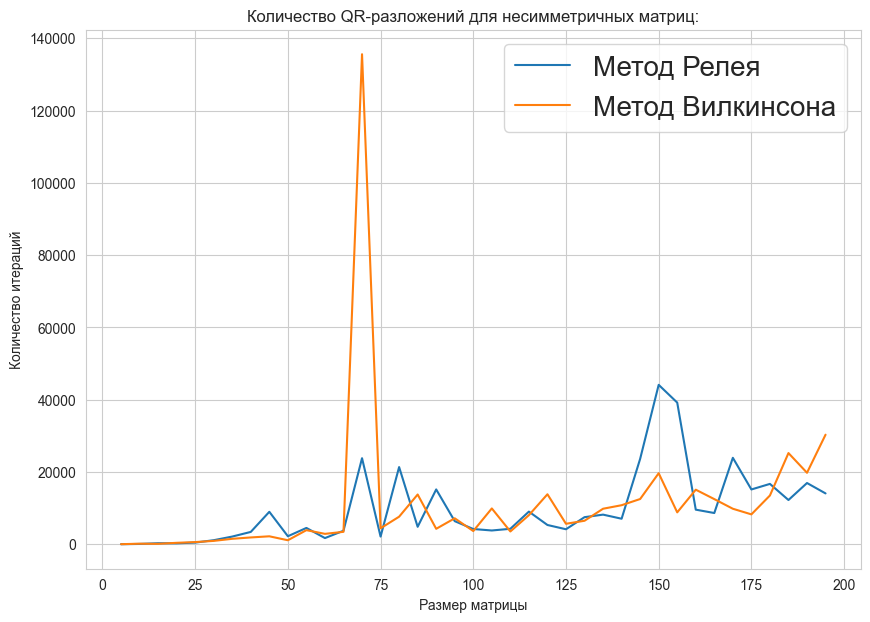

In [29]:
plt.figure(figsize=[10, 7])

plt.title("Количество QR-разложений для несимметричных матриц:")
plt.xlabel("Размер матрицы")
plt.ylabel("Количество итераций")

args = range(5, 200, 5)

plt.plot(args, simple_2, label="Метод Релея")
plt.plot(args, wilkinson_2, label="Метод Вилкинсона")
plt.legend()
plt.show()

In [30]:
naive = []
simple = []
wilkinson = []

for i in range(5, 200, 5):

    A = np.random.random((i, i))

    A = A.T + A

    naive.append(shd.eigenvalues(A, eps=1e-12, simmetric=True, method="naive")[1])
    simple.append(shd.eigenvalues(A, eps=1e-12, simmetric=True, method="simple")[1])
    wilkinson.append(shd.eigenvalues(A, eps=1e-12, simmetric=True, method="wilkinson")[1])

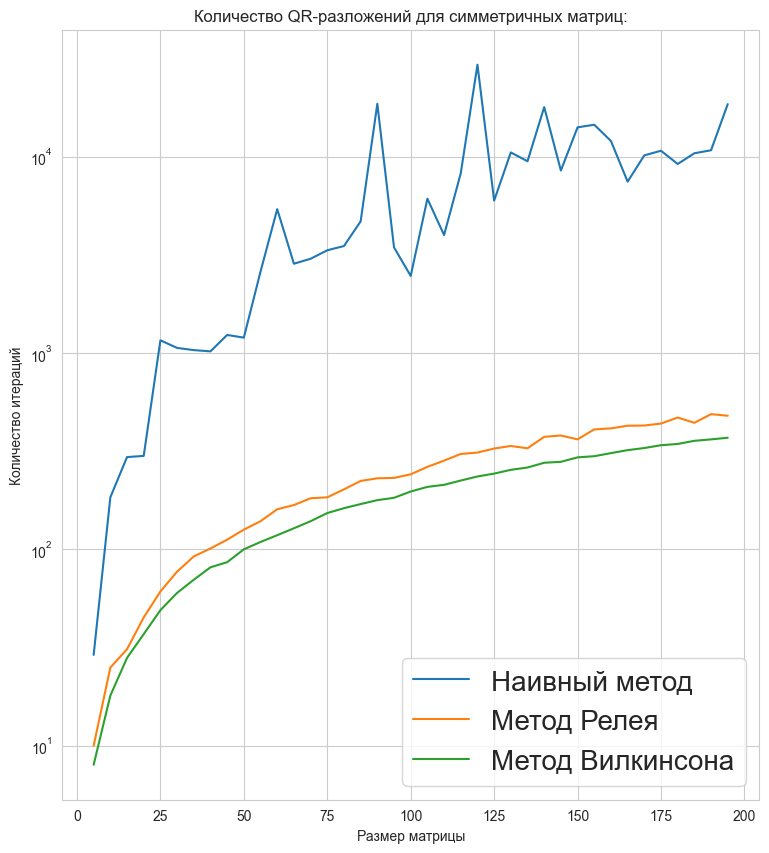

In [40]:
plt.figure(figsize=[9, 10])

plt.title("Количество QR-разложений для симметричных матриц:")
plt.yscale("log")
plt.xlabel("Размер матрицы")
plt.ylabel("Количество итераций")

args = range(5, 200, 5)

plt.plot(args, naive, label="Наивный метод")
plt.plot(args, simple, label="Метод Релея")
plt.plot(args, wilkinson, label="Метод Вилкинсона")
plt.legend()
plt.show()

In [33]:
simple_2 = []
wilkinson_2 = []

for i in range(20, 1001, 20):

    A = np.random.random((i, i))
    A = A.T + A

    simple_2.append(shd.eigenvalues(A, eps=1e-12, simmetric=True, method="simple")[1])
    wilkinson_2.append(shd.eigenvalues(A, eps=1e-12, simmetric=True, method="wilkinson")[1])

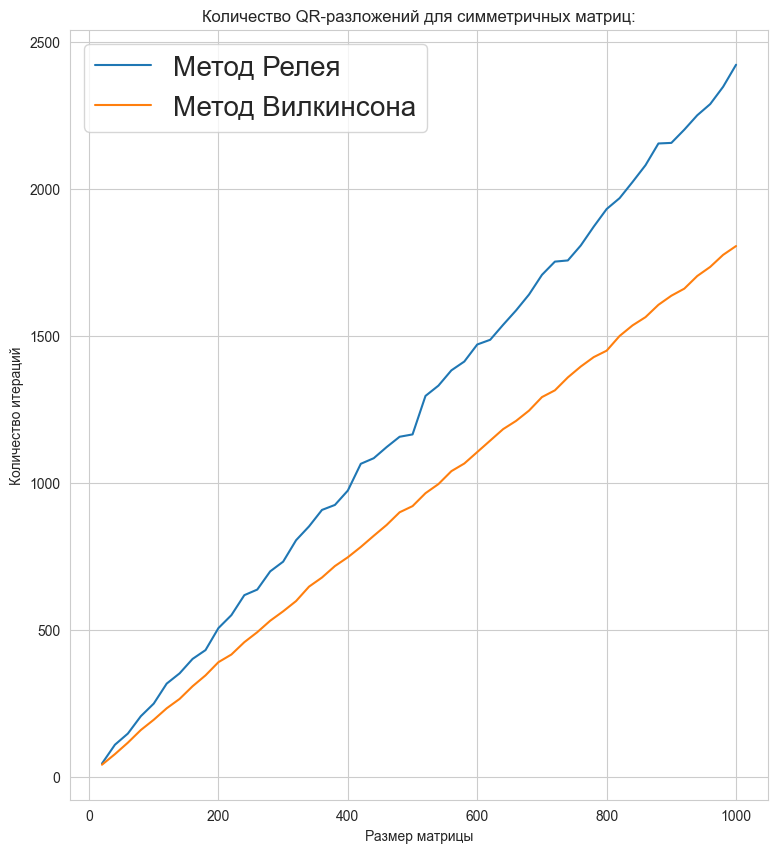

In [39]:
plt.figure(figsize=[9, 10])

plt.title("Количество QR-разложений для симметричных матриц:")
plt.xlabel("Размер матрицы")
plt.ylabel("Количество итераций")

args = range(20, 1001, 20)

plt.plot(args, simple_2, label="Метод Релея")
plt.plot(args, wilkinson_2, label="Метод Вилкинсона")
plt.legend()
plt.show()